In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.linspace(-0.5,2.5,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)

def plot2DFunction(f):
    Z_sphere = f(X,Y)
    contour_lines = np.linspace(-6,6,51)

    fig, ax = plt.subplots()
    ax = fig.gca(projection='3d')
    CS = plt.contour(X, Y, Z_sphere, levels=contour_lines)
    zc = CS.collections[contour_lines.tolist().index(0)]
    zc.set_color([1,0,0])
    plt.show()
    
def plotImplicitFunction(ax,f):
    Z_sphere = f(X,Y)
    ax.contour(X, Y, Z_sphere, levels=[0])

## Contour and roots

<img width="300" src="images/Intersection.png">

$f_\text{line}(x) = m x + b$

$f_\text{curve}: (x-x_a)^4+(y-y_a)^4-r_a^4 = 0$

In [3]:
def curve_residual(x,y, x_a, y_a, r_a):
    return (x-x_a)**4 + (y-y_a)**4 - r_a**4

r_a = 0.7
x_a = 1
y_a = 0

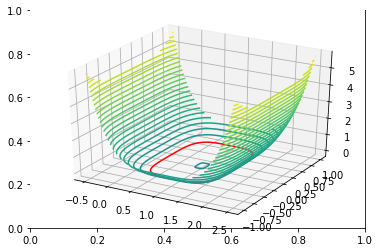

In [4]:
f = lambda x,y : curve_residual(x,y, x_a, y_a, r_a)
plot2DFunction(f)

$f_\text{line}(x) = m x + b$<br>
$r_\text{curve} = (x-x_a)^4+(y-y_a)^4-r_a^2$<br>
$r_\text{line-curve} = (x-x_a)^4+(m x + b-y_a)^4-r_a^4$


In [5]:
m = 0.3
b = -0.2

def line_curve_residual(x):
    return (x-x_a)**4 + (m*x+b-y_a)**4 - r_a**4

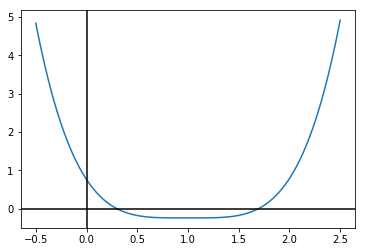

In [6]:
x = np.linspace(-0.5,2.5,100)
y_line_sphere = line_curve_residual(x)

plt.close("all")
fig, ax = plt.subplots()
CS = ax.plot(x, y_line_sphere)
ax.axhline(y=0, color='k');ax.axvline(x=0, color='k')
plt.show()

## Bisection

In [7]:
s1 = optimize.bisect(line_curve_residual,0,1)
s2 = optimize.bisect(line_curve_residual,1.5,2.5)

s1,s2

(0.30010661312371667, 1.6933462322031119)

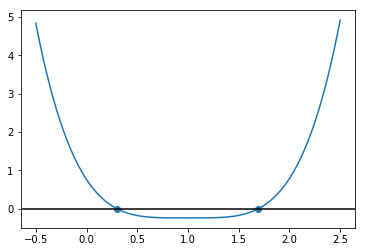

In [8]:
# residual plot
y_line_sphere = line_curve_residual(x)
fig, ax = plt.subplots()
ax.plot(x, y_line_sphere)
ax.axhline(y=0, color='k')
ax.scatter([s1,s2],[0,0])
plt.show()

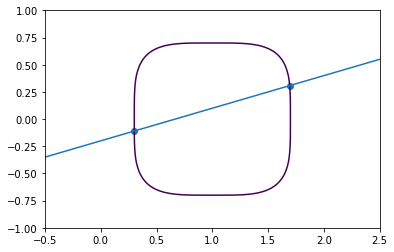

In [9]:
plt.close("all")
fig, ax = plt.subplots()
plotImplicitFunction(ax,f)
ax.scatter([s1,s2],[s1*m+b,s2*m+b])
ax.plot(x, x*m+b)
plt.show()

## Newton's method

$r_\text{line-curve} = (x-x_a)^4+(m x + b-y_a)^4-r_a^2$<br>
$\frac{\partial r_\text{line-curve}}{\partial x}  = 4(x-x_a)^3 + 4m(m x + b-y_a)^3$

In [10]:
def d_line_curve_residual_dx(x):
    return 4*(x-x_a)**3 + 4*m*(m*x+b - y_a)**3

optimize.newton(line_curve_residual, 0.5)
#optimize.newton(line_curve_residual, 0)


0.30010661312352277